# Bioimpedance Spectroscopy Calculations

In [44]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy.optimize import curve_fit 
%matplotlib inline 

#### From presentation paragraphs
  
      "Inspired by Dr. Tagg’s watch, one interesting use of impedance measurements is bioimpedance analysis. Generally, bioimpedance analysis is a noninvasive approach used in body composition measurements and healthcare assessment systems. Like the impedance in our experiment, the bioimpedance is a complex quantity composed of resistance, caused by the total body water, and reactance, caused by the capacitance of cell membranes. These two quantities are put together in a complex expression, which can be used to determine phase angle and impedance magnitude. 
  
    Bioimpedance measurements can be used to estimate body composition by determining body volume through basic resistance measurements. The volume of a human body is generally composed of fat mass, which is a non-conductor of electric charge and is equal to the difference between body weight and fat free mass. Fat free mass acts as the conducting volume through which electric current passes due to conductivity of electrolytes dissolved in body water. 
    
    The measurements themselves are taken by running a weak current through the body and then measuring the voltage. From here, the impedance is calculated. Since fat free mass acts as a conducting volume, a greater presence of it will correlate to lower impedance. Therefore, these measurements can be useful for estimating body fat composition and helping to determine body fat percentage and body mass index.
    
    While these measurements can be used to make estimates, they are generally not extremely accurate. However, these measurements are easy to make and can be useful for tracking changes to body composition over time."*
   
In order to simulate a bioimpedance calculation, we can treat the total body water as a resistor ($R$) and a cell membrane as a capacitor ($X_c$). This gives us the impedance of 

$$ |Z| = \sqrt{R^2 + X_c^2}$$

$$ \phi = arctan\biggr(\frac{X_c}{R}\biggr)$$

The resistance of an object is determined by its shape and the resistivity of its material. Additionally, the reactance of an object (which in this case is approximated as a capacitor) is given by the one over the signal frequency and the value of the capacitance. This gives us two equations. 

$$ R = \rho \frac{L}{A}$$

$$X_c = \frac{1}{2 \pi f C} = \frac{1}{\omega C} $$

Below is an attempt at a non-linear least squares fit that attempts to find the impedance as a function of frequnecy for a range of frequencies that could be used in bioimpedance analysis together with values for the resistance and capacitance from the fit. 

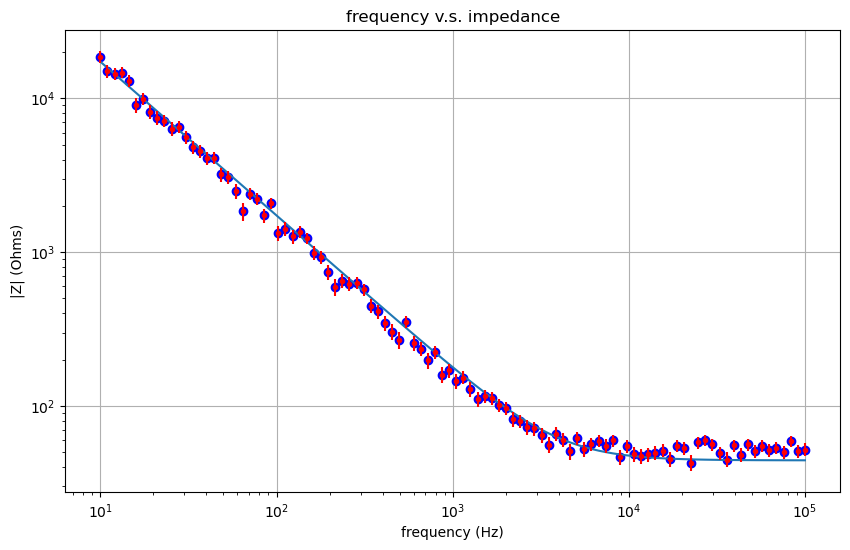

Resistance from fit: 44.284224731498284 Ohms
Capacitance from fit: 9.17931708580517e-07 F


In [43]:
def z_func(freq, r, c):
    omega = 2 * np.pi * freq
    z = np.sqrt((r + 1j / (omega * c))*(r - 1j / (omega * c)))
    return abs(z)

freq_range = np.logspace(1, 5, 100)  # frequency range from 10 Hz to 100 kHz

N = len(freq_range)
np.random.seed(0)
noise = 0.1 * Z1 

Z_noise = Z1 + noise * np.random.randn(len(freq_range))

R_guess = 50
C_guess = 3e-6

popt, pcov = curve_fit(z_func, freq_range, Z_noise, p0=[R_guess, C_guess])
R_fit = popt[0]
C_fit = popt[1]

Z_fit = z_func(freq_range, R_fit, C_fit)

plt.figure(figsize=(10, 6))
plt.plot(freq_range, Z_noise,'bo', freq_range, Z_fit)
plt.errorbar(freq_range, Z_noise, yerr=noise, fmt='r.')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('frequency (Hz)')
plt.ylabel('|Z| (Ohms)')
plt.title('frequency v.s. impedance')
plt.grid(True)
plt.show()

print("Resistance from fit:", r_fit, "Ohms")
print("Capacitance from fit:", c_fit, "F")